In [1]:
# news classification
# classifying news headlines by text classification

# | class values

# e, b, t, m

# | attributes

# title

In [2]:
# data science libraries
# pandas: for analyzing and manipulating datasets\
import pandas as pd
# numpy: library for arrays and additional mathematical functions
import numpy as np
# matplotlib: data visualizer
import matplotlib.pyplot as plt
# texthero
import texthero as hero
# ntlk
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.corpus import wordnet

import seaborn as sn

nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

# scikit-learn: tool for predictive data analysis
from sklearn.model_selection import train_test_split
from sklearn import metrics
from collections import Counter

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Administrator\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Administrator\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Administrator\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Administrator\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [3]:
# names of columns
col_names = ['title','category']
# read dataset
news_headlines = pd.read_csv('newsCorpora_with_header.csv', names=col_names, sep="\t", skiprows=[0])

In [4]:
news_headlines.head(6)

,title,category
0,"Fed official says weak data caused by weather,...",b
1,Fed's Charles Plosser sees high bar for change...,b
2,US open: Stocks fall after Fed official hints ...,b
3,"Fed risks falling 'behind the curve', Charles ...",b
4,Fed's Plosser: Nasty Weather Has Curbed Job Gr...,b
5,Plosser: Fed May Have to Accelerate Tapering Pace,b


In [5]:
# preprocessing the headlines
# clean command: lowercase, remove accents, remove punctuations, remove stop words, remove digits, fill NA, remove white space
news_headlines['title'] = hero.clean(news_headlines['title'])
news_headlines.head(6)

,title,category
0,fed official says weak data caused weather slo...,b
1,fed charles plosser sees high bar change pace ...,b
2,us open stocks fall fed official hints acceler...,b
3,fed risks falling behind curve charles plosser...,b
4,fed plosser nasty weather curbed job growth,b
5,plosser fed may accelerate tapering pace,b


In [6]:
# lemmatizer
wl = WordNetLemmatizer()

def word_lemmatizer(text):
    tokens = nltk.word_tokenize(text)
    tokens = [wl.lemmatize(token) for token in tokens]
    return ' '.join(tokens)

news_headlines['title'] = news_headlines['title'].apply(word_lemmatizer)
news_headlines['title'].head(5)

0    fed official say weak data caused weather slow...
1    fed charles plosser see high bar change pace t...
2    u open stock fall fed official hint accelerate...
3    fed risk falling behind curve charles plosser say
4          fed plosser nasty weather curbed job growth
Name: title, dtype: object

In [7]:
# check for numbers of set
news_headlines.count()

title       422937
category    422937
dtype: int64

In [8]:
# check for missing values
news_headlines.isna().sum()

title       0
category    0
dtype: int64

In [9]:
# check for targets distribution 
b = news_headlines[news_headlines['category']=='b']
t = news_headlines[news_headlines['category']=='t']
e = news_headlines[news_headlines['category']=='e']
m = news_headlines[news_headlines['category']=='m']
category = news_headlines['category']

In [10]:
# set features and target from the dataset
x = news_headlines.drop(['category'], axis=1) # feature
y = news_headlines['category'] # target

In [11]:
# feature extraction
from sklearn.feature_extraction.text import TfidfVectorizer

# initialize tfidf vectorizer
tfidf = TfidfVectorizer()

x = tfidf.fit_transform(news_headlines['title'])

In [12]:
# feature selection
from sklearn.feature_selection import VarianceThreshold
selection = VarianceThreshold(threshold=0.001)
x = selection.fit_transform(x)

In [13]:
# split the dataset into training set and test set
# test split = 70:30
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, shuffle=True, random_state=0)

In [14]:
# oversampling using randomoversampler
from imblearn.over_sampling import RandomOverSampler
over_sampler = RandomOverSampler(random_state=42)

#x_res, y_res = over_sampler.fit_resample(x_train, y_train)

In [15]:
# normal class distribution
print('Normal Class Distribution: ', Counter(y_train))
# oversamplings
#print('Oversamplings: ', Counter(y_res))

Normal Class Distribution:  Counter({'e': 106983, 'b': 80855, 't': 76344, 'm': 31873})


In [16]:
# import classification report
from sklearn.metrics import classification_report
targets = ['business','entertainment','health','science & technology']

In [18]:
# import decision tree classifier
# classification tree for categorical dataset
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(criterion='gini') # dtc classifier instatiated

# oversamplings class distribution
# start generating model
dtc = dtc.fit(x_train, y_train)
# model evaluation
y_pred = dtc.predict(x_test)

In [19]:
# check for model accuracy, precision, and recall
# accuracy score %
score = metrics.accuracy_score(y_test, y_pred);

print('Accuracy: ', round(score * 100, 2), '%')
print(classification_report(y_test,y_pred, target_names=targets))

Accuracy:  51.57 %
                      precision    recall  f1-score   support

            business       0.60      0.27      0.37     35112
       entertainment       0.47      0.88      0.61     45845
              health       0.28      0.09      0.14     13766
science & technology       0.70      0.45      0.55     32159

            accuracy                           0.52    126882
           macro avg       0.51      0.42      0.42    126882
        weighted avg       0.54      0.52      0.48    126882



In [20]:
# import naive bayes classifier
# multinomial naive bayes classifier for text 
from sklearn.naive_bayes import MultinomialNB

nb = MultinomialNB()
nb = nb.fit(x_train, y_train)
mnb_y_pred = nb.predict(x_test)

In [21]:
# check for model accuracy, precision, and recall
# accuracy score %
score = metrics.accuracy_score(y_test, mnb_y_pred);

print('Accuracy: ', round(score * 100, 2), '%')
print(classification_report(y_test, mnb_y_pred, target_names=targets))

Accuracy:  52.87 %
                      precision    recall  f1-score   support

            business       0.71      0.26      0.38     35112
       entertainment       0.45      0.98      0.62     45845
              health       0.25      0.00      0.00     13766
science & technology       0.88      0.40      0.55     32159

            accuracy                           0.53    126882
           macro avg       0.57      0.41      0.39    126882
        weighted avg       0.61      0.53      0.47    126882



In [22]:
# import eural networking classifier
# multi-layer perceptron
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(solver="adam", alpha=1e-5, hidden_layer_sizes=(5,2), random_state=1, max_iter=400)
mlp = mlp.fit(x_train, y_train)
p_y_pred = mlp.predict(x_test)

In [23]:
# check for model accuracy, precision, and recall
# accuracy score %
score = metrics.accuracy_score(y_test, p_y_pred);

print('Accuracy: ', round(score * 100, 2), '%')
print(classification_report(y_test,p_y_pred, target_names=targets))

Accuracy:  52.32 %


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                      precision    recall  f1-score   support

            business       0.53      0.27      0.35     35112
       entertainment       0.47      0.93      0.63     45845
              health       0.00      0.00      0.00     13766
science & technology       0.77      0.44      0.56     32159

            accuracy                           0.52    126882
           macro avg       0.44      0.41      0.39    126882
        weighted avg       0.51      0.52      0.47    126882



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


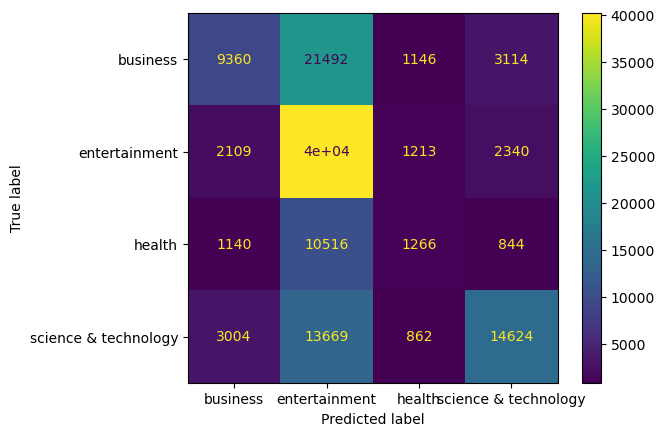

In [24]:
# confusion matrix
# import confusion matrix
from sklearn import metrics
cm = metrics.confusion_matrix(y_test, y_pred, labels=['b','e','m','t'])
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=targets)
cm_display.plot()
plt.show()

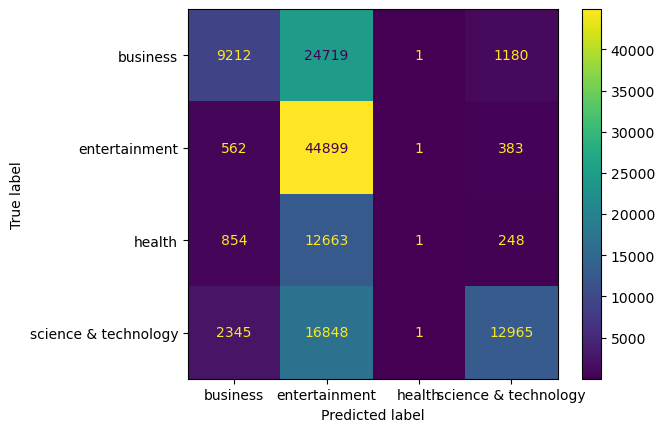

In [25]:
cm_1 = metrics.confusion_matrix(y_test, mnb_y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix=cm_1, display_labels=targets)
cm_display.plot()
plt.show()

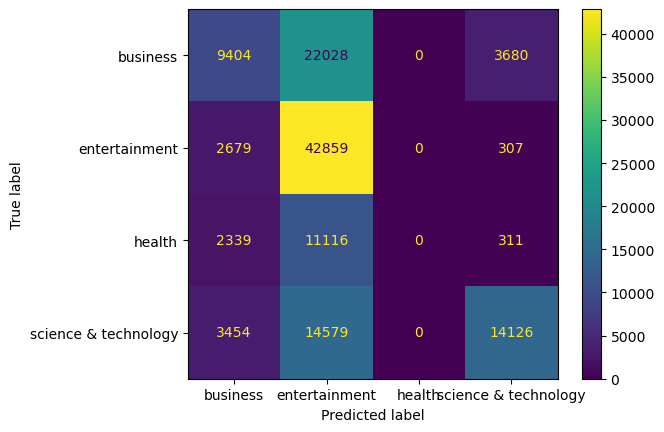

In [26]:
cm_2 = metrics.confusion_matrix(y_test, p_y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix=cm_2, display_labels=targets)
cm_display.plot()
plt.show()